In [1]:
from bsread import source, SUB, PULL, PUSH, PUB
import matplotlib.pyplot as plt
import numpy as np

In [8]:
#from cam_server.utils import get_host_port_from_stream_address

port=9001
host = "sf-daqsync-10.psi.ch"
mode = SUB
num_shots = 1
x_corr = []
signal = []
att = []
edge_pos = []
with source(host=host, port=port, mode=SUB) as stream:
    for i in range(0,num_shots):
        message = stream.receive()
#         print(message.data.data.keys())
        x_corr.append(message.data.data['SAROP11-ATT01:xcorr'].value)
        signal.append(message.data.data['SAROP11-ATT01:signal'].value)
        att.append(message.data.data['SAROP11-ATT01:arrival_time'].value)
        edge_pos.append(message.data.data['SAROP11-ATT01:edge_pos'].value)        
x_corr = np.asarray(x_corr)        

In [3]:
x_corr

array([[ 0.23890828,  0.28642209,  0.32621874, ..., 11.79468872,
         8.76999502,  5.71991225],
       [ 0.29970114,  0.3502415 ,  0.39299751, ..., 11.61968516,
         8.62302571,  5.60961573],
       [ 0.20455924,  0.24979802,  0.28884413, ..., 11.76477218,
         8.79543194,  5.80772437],
       ...,
       [ 0.24677509,  0.29411347,  0.33500821, ..., 11.75332998,
         8.90126929,  6.03244329],
       [ 0.174488  ,  0.23032909,  0.27907146, ..., 11.97347873,
         9.06737141,  6.13478814],
       [ 0.25318491,  0.30368356,  0.34806176, ..., 12.22895705,
         9.4391075 ,  6.62095659]])

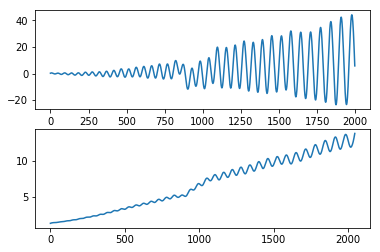

In [7]:
ind = 10
plt.figure()
plt.subplot(211)
plt.plot(x_corr[ind])
plt.subplot(212)
plt.plot(signal[ind])


/sf/photo/miniconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6575: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/sf/photo/miniconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6576: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: max must be larger than min in range parameter.

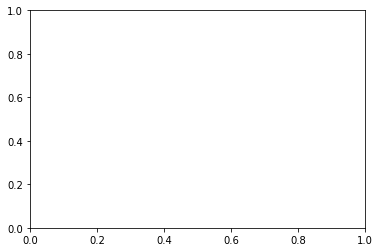

In [ ]:
plt.figure()
plt.hist(edge_pos)